<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(_2)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-2'

In [4]:
os.listdir(base_path)

['data_add_delta_-2_n20.csv',
 'data_add_delta_-2_n30.csv',
 'data_add_delta_-2_n60.csv',
 'data_add_delta_-2_n120.csv',
 'data_add_delta_-2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,39.155982,27.927383,37.249499,0.002376,114.335241,114.330253,0.004988
1,0.0,1.0,97.465085,91.006693,20.248044,0.011592,218.731414,218.712819,0.018595
2,0.0,2.0,23.246462,71.946323,25.338045,-0.020551,130.510279,130.525097,-0.014817
3,0.0,3.0,26.233796,87.397591,63.894934,-0.006641,187.519681,187.526068,-0.006387
4,0.0,4.0,24.321436,58.898429,63.778162,-0.021341,156.976686,156.998581,-0.021895
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,48.503006,40.684454,68.149739,0.012793,167.349992,167.337332,0.012660
119996,999.0,116.0,20.290452,67.779585,89.206815,-0.001834,187.275019,187.282525,-0.007506
119997,999.0,117.0,60.856062,76.014766,37.611869,-0.005363,184.477334,184.477469,-0.000135
119998,999.0,118.0,63.106186,51.799209,24.395328,-0.016660,149.284063,149.294052,-0.009989


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,39.155982,27.927383,37.249499,0.002376,114.335241,114.330253,0.004988
1,0.0,1.0,97.465085,91.006693,20.248044,0.011592,218.731414,218.712819,0.018595
2,0.0,2.0,23.246462,71.946323,25.338045,-0.020551,130.510279,130.525097,-0.014817
3,0.0,3.0,26.233796,87.397591,63.894934,-0.006641,187.519681,187.526068,-0.006387
4,0.0,4.0,24.321436,58.898429,63.778162,-0.021341,156.976686,156.998581,-0.021895
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,48.503006,40.684454,68.149739,0.012793,167.349992,167.337332,0.012660
119996,999.0,116.0,20.290452,67.779585,89.206815,-0.001834,187.275019,187.282525,-0.007506
119997,999.0,117.0,60.856062,76.014766,37.611869,-0.005363,184.477334,184.477469,-0.000135
119998,999.0,118.0,63.106186,51.799209,24.395328,-0.016660,149.284063,149.294052,-0.009989


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    39.155982  27.927383  37.249499  ...  114.335241  114.330253  0.004988
      1.0    97.465085  91.006693  20.248044  ...  218.731414  218.712819  0.018595
      2.0    23.246462  71.946323  25.338045  ...  130.510279  130.525097 -0.014817
      3.0    26.233796  87.397591  63.894934  ...  187.519681  187.526068 -0.006387
      4.0    24.321436  58.898429  63.778162  ...  156.976686  156.998581 -0.021895
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  48.503006  40.684454  68.149739  ...  167.349992  167.337332  0.012660
      116.0  20.290452  67.779585  89.206815  ...  187.275019  187.282525 -0.007506
      117.0  60.856062  76.014766  37.611869  ...  184.477334  184.477469 -0.000135
      118.0  63.106186  51.799209  24.395328  ...  149.284063  149.294052 -0.009989
      119.0  54.182099  44.177582  66.737739  ...  175.106106  175.096640  0.009466

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    39.155982  27.927383  37.249499  ...  114.335241  114.330253  0.004988
      1.0    97.465085  91.006693  20.248044  ...  218.731414  218.712819  0.018595
      2.0    23.246462  71.946323  25.338045  ...  130.510279  130.525097 -0.014817
      3.0    26.233796  87.397591  63.894934  ...  187.519681  187.526068 -0.006387
      4.0    24.321436  58.898429  63.778162  ...  156.976686  156.998581 -0.021895
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  48.503006  40.684454  68.149739  ...  167.349992  167.337332  0.012660
      116.0  20.290452  67.779585  89.206815  ...  187.275019  187.282525 -0.007506
      117.0  60.856062  76.014766  37.611869  ...  184.477334  184.477469 -0.000135
      118.0  63.106186  51.799209  24.395328  ...  149.284063  149.294052 -0.009989
      119.0  54.182099  44.177582  66.737739  ...  175.106106  175.096640  0.009466

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,39.155982,27.927383,37.249499,0.002376,114.335241,114.330253,0.004988
1,0.0,1.0,97.465085,91.006693,20.248044,0.011592,218.731414,218.712819,0.018595
2,0.0,2.0,23.246462,71.946323,25.338045,-0.020551,130.510279,130.525097,-0.014817
3,0.0,3.0,26.233796,87.397591,63.894934,-0.006641,187.519681,187.526068,-0.006387
4,0.0,4.0,24.321436,58.898429,63.778162,-0.021341,156.976686,156.998581,-0.021895
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,48.503006,40.684454,68.149739,0.012793,167.349992,167.337332,0.012660
119996,999.0,116.0,20.290452,67.779585,89.206815,-0.001834,187.275019,187.282525,-0.007506
119997,999.0,117.0,60.856062,76.014766,37.611869,-0.005363,184.477334,184.477469,-0.000135
119998,999.0,118.0,63.106186,51.799209,24.395328,-0.016660,149.284063,149.294052,-0.009989


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    39.155982  27.927383  37.249499  ...  114.335241  114.330253  0.004988
      1.0    97.465085  91.006693  20.248044  ...  218.731414  218.712819  0.018595
      2.0    23.246462  71.946323  25.338045  ...  130.510279  130.525097 -0.014817
      3.0    26.233796  87.397591  63.894934  ...  187.519681  187.526068 -0.006387
      4.0    24.321436  58.898429  63.778162  ...  156.976686  156.998581 -0.021895
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  48.503006  40.684454  68.149739  ...  167.349992  167.337332  0.012660
      116.0  20.290452  67.779585  89.206815  ...  187.275019  187.282525 -0.007506
      117.0  60.856062  76.014766  37.611869  ...  184.477334  184.477469 -0.000135
      118.0  63.106186  51.799209  24.395328  ...  149.284063  149.294052 -0.009989
      119.0  54.182099  44.177582  66.737739  ...  175.106106  175.096640  0.009466

[120000 rows x 7 columns]

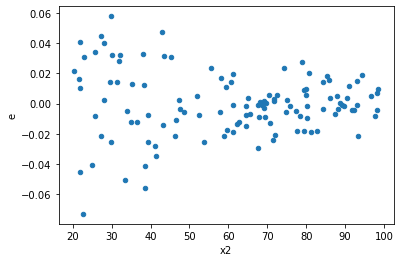

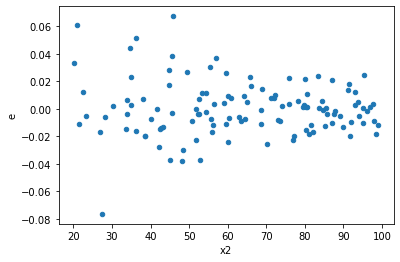

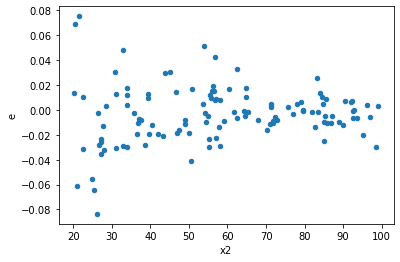

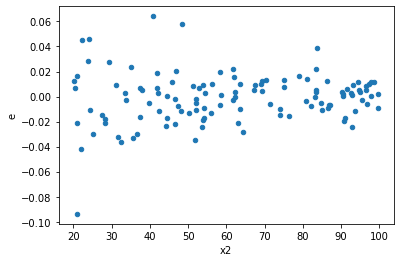

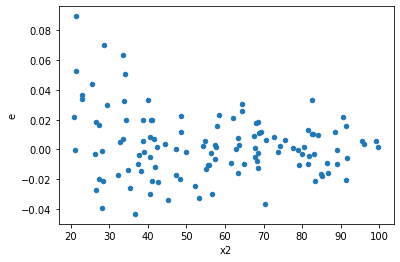

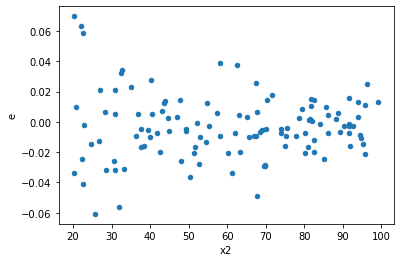

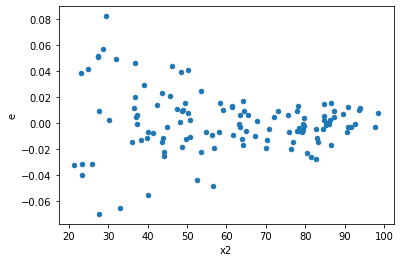

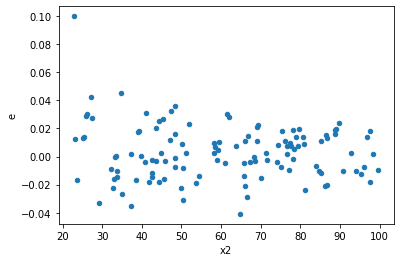

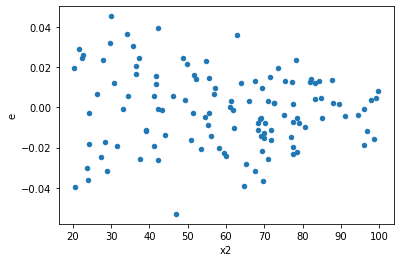

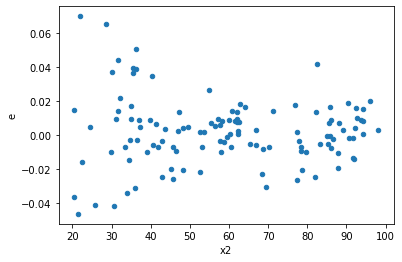

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,0.03878324140933101,0.006553016312548119,0.0008618498090962447,0.00014562258472329155,0.16896515284489616,2.15370546246881e-08,Reject001=0 : Heteroscedasticity
1.0,45.0,45.0,0.033721984106883686,0.007089202364504207,0.0007493774245974152,0.00015753783032231572,0.2102249482721595,6.67349955809025e-07,Reject001=0 : Heteroscedasticity
2.0,45.0,45.0,0.04302325721476678,0.005002332389877644,0.000956072382550373,0.00011116294199728098,0.11627042473577998,3.457879579309826e-11,Reject001=0 : Heteroscedasticity
3.0,45.0,45.0,0.034895364310148225,0.006241143102157245,0.0007754525402255161,0.00013869206893682765,0.1788530719062361,5.400930391294185e-08,Reject001=0 : Heteroscedasticity
4.0,45.0,45.0,0.03177463166011918,0.008865401094359286,0.0007061029257804262,0.00019700891320798415,0.2790087762208865,3.692119227882437e-05,Reject001=0 : Heteroscedasticity
5.0,45.0,45.0,0.03326267289989652,0.007137117488225299,0.0007391705088865893,0.00015860261084945108,0.21456836946640878,9.07342305185752e-07,Reject001=0 : Heteroscedasticity
6.0,45.0,45.0,0.04943857534874947,0.004750834069878446,0.0010986350077499883,0.00010557409044174324,0.09609569119589559,1.0384985414746629e-12,Reject001=0 : Heteroscedasticity
7.0,45.0,45.0,0.02541819322970514,0.007661981039188354,0.000564848738437892,0.00017026624531529675,0.30143688695521165,0.00010043254247470786,Reject001=0 : Heteroscedasticity
8.0,45.0,45.0,0.025471878615743564,0.007987359393090815,0.0005660417470165236,0.0001774968754020181,0.313575591089462,0.00016460265873518445,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    996
Reject001=1 : Homoscedasticity        4
Name: Result_test, dtype: int64